In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

In [5]:
df = pd.read_csv('heart.csv') 

In [7]:
scale_feature = 'trestbps'             # артериальное давление в покое
scaler = StandardScaler()
df[f'{scale_feature}_scaled'] = scaler.fit_transform(df[[scale_feature]])

print(f'\n{scale_feature} — среднее после масштабирования: '
      f'{df[f"{scale_feature}_scaled"].mean():.2f}, '
      f': {df[f"{scale_feature}_scaled"].std(ddof=0):.2f}')


trestbps — среднее после масштабирования: -0.00, : 1.00


In [8]:
cat_feature = 'cp'                     # тип боли в груди

# 3а. Label Encoding
le = LabelEncoder()
df[f'{cat_feature}_label'] = le.fit_transform(df[cat_feature])

# 3б. One-Hot Encoding
ohe = OneHotEncoder(sparse_output=False, dtype=int, handle_unknown='ignore')
ohe_array = ohe.fit_transform(df[[cat_feature]])
ohe_cols = ohe.get_feature_names_out([cat_feature])     # например: ['cp_0', 'cp_1', 'cp_2', 'cp_3']
df[ohe_cols] = ohe_array

print(f'\nЧастоты классов {cat_feature}:')
print(df[cat_feature].value_counts().sort_index())



Частоты классов cp:
cp
0    497
1    167
2    284
3     77
Name: count, dtype: int64


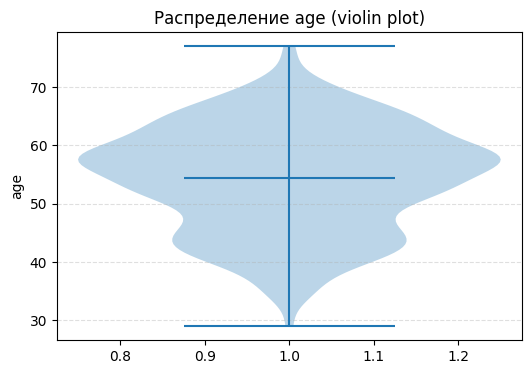

In [9]:
violin_feature = 'age'                 # можно заменить на любой числовой столбец

plt.figure(figsize=(6, 4))
plt.violinplot(df[violin_feature], showmeans=True)
plt.title(f'Распределение {violin_feature} (violin plot)')
plt.ylabel(violin_feature)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

In [ ]:
#Violin-plot показывает, что возраст пациентов в основном сосредоточен между 45 и 65 годами, 
# с умеренно тяжёлым «хвостом» к старшему возрасту. Это следует учитывать, 
# если модель должна одинаково хорошо работать и для малых групп (например, 
# очень молодых пациентов).

In [10]:
print('\nНовые столбцы в датафрейме:', 
      [f'{scale_feature}_scaled', f'{cat_feature}_label', *ohe_cols])

print('\nПервые пять строк набора данных после всех преобразований:')
print(df.head())


Новые столбцы в датафрейме: ['trestbps_scaled', 'cp_label', 'cp_0', 'cp_1', 'cp_2', 'cp_3']

Первые пять строк набора данных после всех преобразований:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  trestbps_scaled  cp_label  cp_0  cp_1  cp_2  cp_3  
0   2     3       0        -0.377636         0     1     0     0     0  
1   0     3       0         0.479107         0     1     0     0     0  
2   0     3       0         0.764688         0     1     0     0     0  
3   1     3       0         0.936037         0     1     0     0    

In [ ]:
#trestbps после нормировки сопоставим по масштабу с 
# другими числовыми признаками, что важно для алгоритмов, 
# чувствительных к размерностям.

#Категориальный cp теперь представлен двумя версиями — порядковой (cp_label) 
# и one-hot; выбор зависит от модели.